sediakan data yang akan dilakukan tahapan linear regression dan import library yang dibutuhkan

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

from google.colab import files
uploded = files.upload()

Saving CarPrice_Assignment (1).csv to CarPrice_Assignment (1).csv


In [ ]:
# dataset
disease_df = pd.read_csv("CarPrice_Assignment (1).csv")
disease_df.drop(['fueltype'], inplace = True, axis = 1)
disease_df.rename(columns ={'car_ID':'enginetype'}, inplace = True)

# removing NaN / NuLL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.fuelsystem.value_counts())

   enginetype  symboling                   CarName aspiration doornumber  \
0           1          3        alfa-romero giulia        std        two   
1           2          3       alfa-romero stelvio        std        two   
2           3          1  alfa-romero Quadrifoglio        std        two   
3           4          2               audi 100 ls        std       four   
4           5          2                audi 100ls        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2

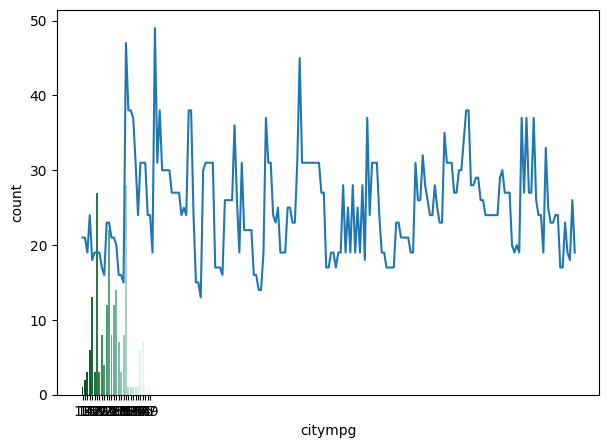

In [ ]:
# counting no. of patients affected with car_ID
plt.figure(figsize=(7, 5))
sn.countplot(x='citympg', data=disease_df,
             palette="BuGn_r")
plt.show

laste = disease_df['citympg'].plot()
plt.show(laste)

In [ ]:
# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
# Train-and-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (700, 2) (700,)
Test set: (300, 2) (300,)


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluation and accuracy
from sklearn.metrics import jaccard_score

print('')
print('Accuracy of the model in jaccard score is = ',
      jaccard_score(y_test, y_pred))


Accuracy of the model in jaccard score is =  0.8333333333333334


In [ ]:
# This code is contributed by @amartajisce
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

score = rf.score(X_test,y_test)*100
print('Accuracy of the model is = ', score)

Accuracy of the model is =  99.66666666666667


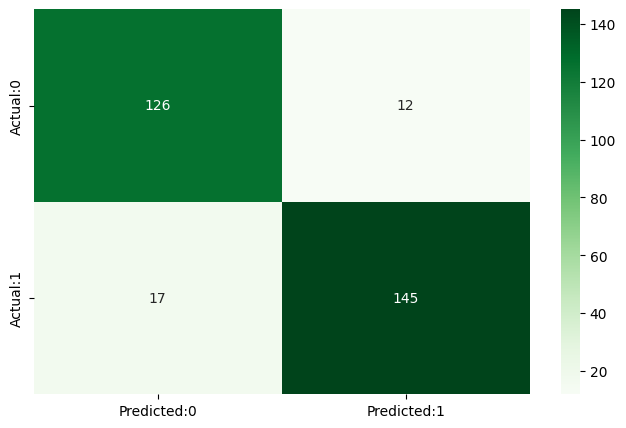

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       138
           1       0.92      0.90      0.91       162

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))